# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.style.use('ggplot')



df = pd.read_csv('train.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None
               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000 

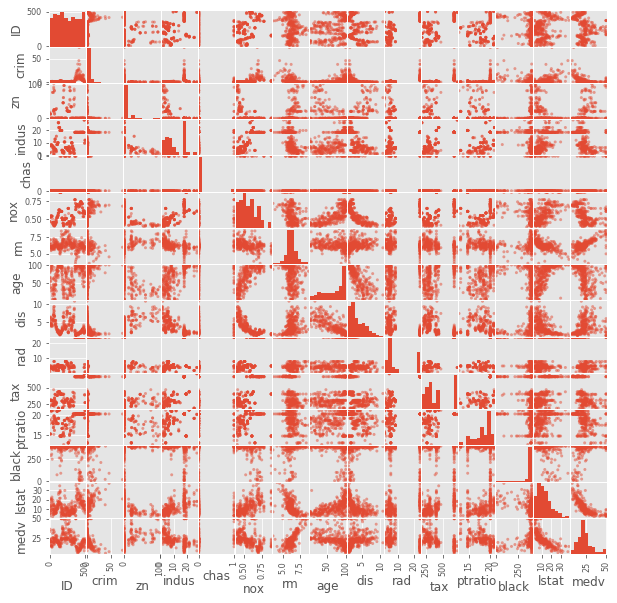

In [24]:
import seaborn as sns
pd.plotting.scatter_matrix(df, figsize=(10,10));

Text(0, 0.5, 'Per Capita Crime Rate By Town')

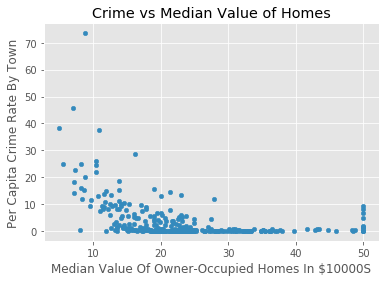

In [3]:

crime_vs_medv = df.iloc[:, [1,14]] #crime rate vs median home value
crime_vs_medv.plot.scatter(x='medv', y='crim')
plt.title('Crime vs Median Value of Homes')
plt.xlabel(str('median value of owner-occupied homes in $10000s').title())
plt.ylabel(str('per capita crime rate by town').title())

In [4]:
# There appears to be more crime in areas where the median value of homes is lower.
# There is a notable spike in crime in the areas with the highest home values.

Text(0, 0.5, 'Number of Homes')

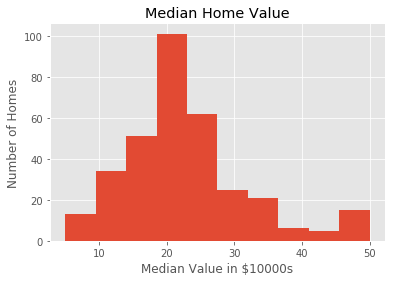

In [5]:
crime_vs_medv['medv'].hist()
plt.title('Median Home Value')
plt.xlabel('Median Value in $10000s')
plt.ylabel('Number of Homes')

In [6]:
# The distribtuion of median home values is fairly normal in shape.
# The average home value is approximately $200,000
# The number of homes valued upwards of $450,000 is slightly higher than would be expected given a normal distribution.

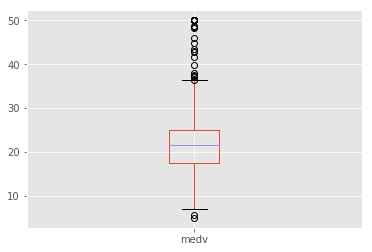

In [7]:
df.medv.plot(kind='box')

Text(0, 0.5, 'Number of Towns')

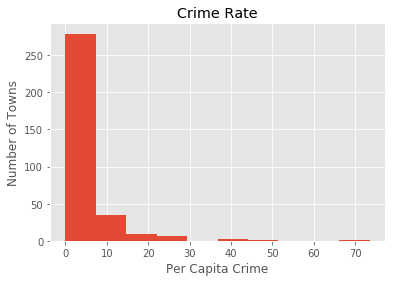

In [8]:
crime_vs_medv['crim'].hist()
plt.title('Crime Rate')
plt.xlabel('Per Capita Crime')
plt.ylabel('Number of Towns')

In [9]:
# The distribution of crime rate is skewed right.
# The average crime rate is less than 10 for most towns.
# There are several outliers of very high crime rates for a small number of towns

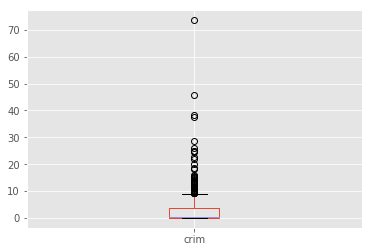

In [25]:
df.crim.plot(kind='box')

Text(0, 0.5, 'Per Capita Crime Rate By Town')

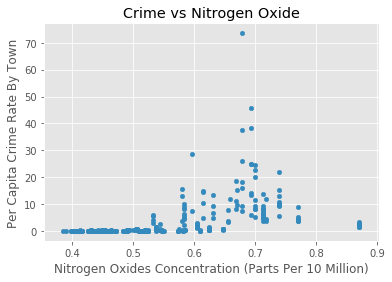

In [10]:
crime_vs_nox = df.iloc[:, [1,5]] #crime rate vs median home value
crime_vs_nox.plot.scatter(x='nox', y='crim')
plt.title('Crime vs Nitrogen Oxide')
plt.xlabel(str('nitrogen oxides concentration (parts per 10 million)').title())
plt.ylabel(str('per capita crime rate by town').title())

In [11]:
# As nitrogen oxide concentration increases, crime rate also increases on average.

Text(0, 0.5, 'Number of Towns')

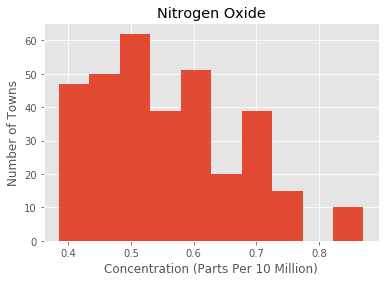

In [12]:
crime_vs_nox['nox'].hist()
plt.title('Nitrogen Oxide')
plt.xlabel('Concentration (Parts Per 10 Million)')
plt.ylabel('Number of Towns')

In [13]:
# The distribution of nitrogen oxide concentrations is skewed right but with some randomness.
# The majority of towns have concentrations of less than 0.6 part per 10 million

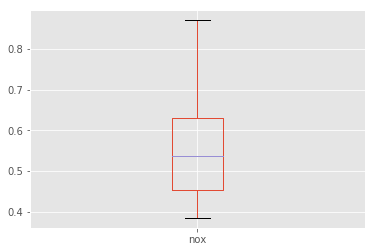

In [14]:
df.nox.plot(kind='box')

Text(0.5, 0, 'Proportion Of Owner-Occupied Units Built Prior To 1940')

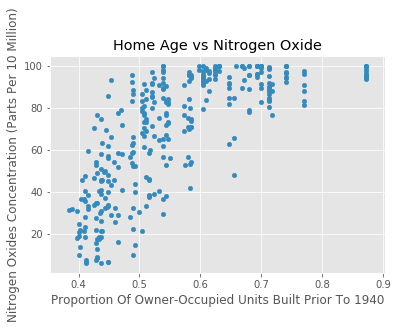

In [15]:
nox_vs_age = df.iloc[:, [5,7]] #crime rate vs median home value
nox_vs_age.plot.scatter(x='nox', y='age')
plt.title('Home Age vs Nitrogen Oxide')
plt.ylabel(str('nitrogen oxides concentration (parts per 10 million)').title())
plt.xlabel(str('proportion of owner-occupied units built prior to 1940').title())

In [16]:
# As the proportion of homes built prior to 1940 increases, the concentration of nitrogen oxides also increases

Text(0, 0.5, 'Number of Towns')

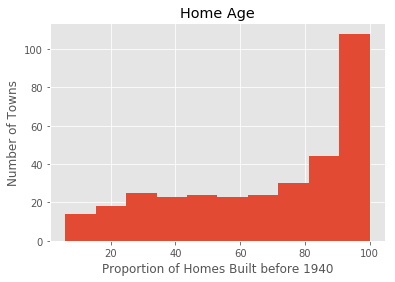

In [17]:
nox_vs_age['age'].hist()
plt.title('Home Age')
plt.xlabel('Proportion of Homes Built before 1940')
plt.ylabel('Number of Towns')

In [18]:
# The distribution of towns with homes built before 1940 is skewed left.
# Most towns have over 80% of homes being built before 1940 and approximately 110 towns have 90% or higher 
# of their homes being built before 1940

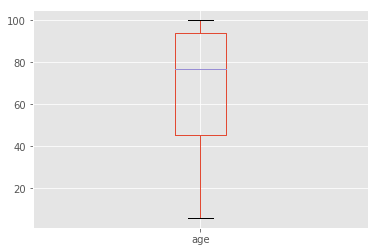

In [19]:
df.age.plot(kind='box')

In [20]:
print(np.corrcoef(crime_vs_medv['crim'], crime_vs_medv['medv'])[0][1])

-0.4074543235732591


In [21]:
print(np.corrcoef(crime_vs_nox['crim'], crime_vs_nox['nox'])[0][1])

0.4630009856612331


In [22]:
print(np.corrcoef(nox_vs_age['nox'], nox_vs_age['age'])[0][1])

0.735999582842286


In [23]:
# According to correlation coefficients: 

# Crime and median home value have a moderately negative linear relationship
# Crime and nitrogen oxide concentration have a moderately positive linear relationship
# Nitrogen oxide concentration and home age have a strongly positive linear relationship

Text(0.5, 0, 'Number of Rooms')

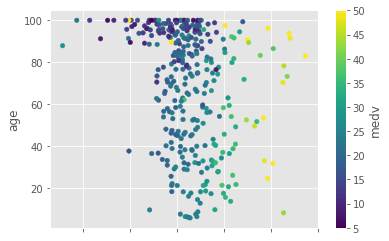

In [40]:
df.plot.scatter(x='rm', y='age', c='medv', colormap='viridis')
plt.xlabel('Number of Rooms')

In [ ]:
# From this scatter it appears that having more old homes in a town will not increase the median home value 
# as much as the number of rooms in the homes does